In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#creating an earlystopping instance with patience of 10 as patience of 5 stopped already at epoch 32

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=10,
                                        restore_best_weights=True)

# Fitting the RNN to the Training set and saving it to a history var
history = regressor.fit(X_train, y_train, epochs = 200, batch_size = 32, callbacks=[earlystopping])

Epoch 1/200
38/38 [==============================] - 7s 55ms/step - loss: 0.0471
Epoch 2/200
38/38 [==============================] - 2s 54ms/step - loss: 0.0062
Epoch 3/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0058
Epoch 4/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0058
Epoch 5/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0052
Epoch 6/200
38/38 [==============================] - 2s 56ms/step - loss: 0.0049
Epoch 7/200
38/38 [==============================] - 2s 56ms/step - loss: 0.0049
Epoch 8/200
38/38 [==============================] - 2s 56ms/step - loss: 0.0047
Epoch 9/200
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 10/200
38/38 [==============================] - 2s 54ms/step - loss: 0.0049
Epoch 11/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0042
Epoch 12/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0043
Epoch 13/200
38/38 [=====

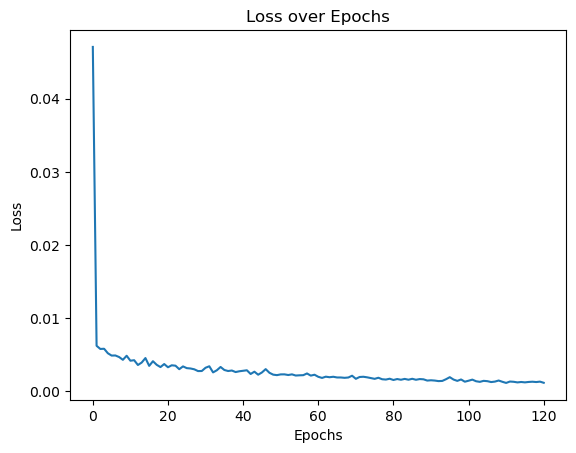

In [17]:
plt.plot(range(0, 121), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


As we can see above, the loss slightly keeps decreasing, however the biggest change can be noted up to epoch 32 (as it was observed during the first iteration with patience of 5)

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 974ms/step


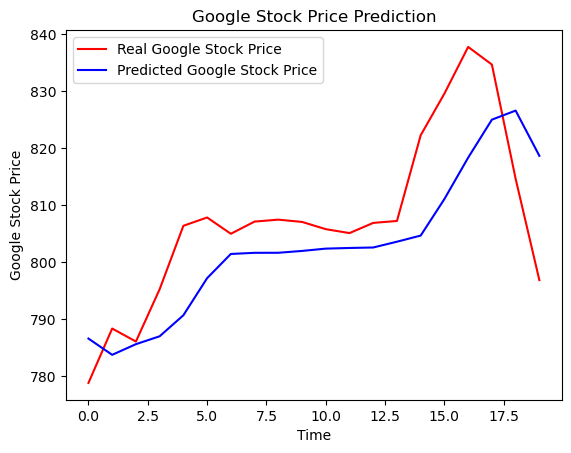

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()